In [1]:
import numpy as np
import matplotlib.pyplot as plt
import astropy.io.fits as fits
import astropy.wcs as WCS
from astropy.table import Table
from astropy import units as u

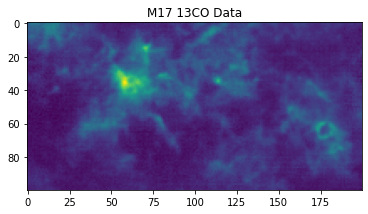

In [2]:
path_M17_13 = '../Real_Data_Test/Real_Data/M17_13CO_Part.fits'
path = path_M17_13
real_data_M17 = fits.getdata(path)
plt.title('M17 13CO Data')
plt.imshow(real_data_M17.sum(0))
plt.show()

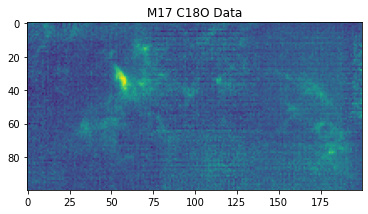

In [15]:
path_M17_18 = '../Real_Data_Test/Real_Data/M17_C18O_Part.fits'
path = path_M17_18
real_data_M17_18 = fits.getdata(path_M17_18)
plt.title('M17 C18O Data')
plt.imshow(real_data_M17_18.sum(0))
plt.show()

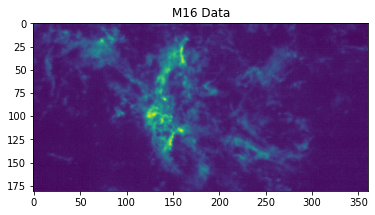

In [4]:
path_M16 = '../Real_Data_Test/Real_Data/hdu0_mosaic_L.fits'
real_data_M16 = fits.getdata(path_M16)
plt.title('M16 Data')
plt.imshow(real_data_M16.sum(0))
plt.show()

## Installation and use of ConBased 

In [5]:
# pip install ConBased

from ConBased.Detect_Files import Detect as DF_ConBased

## Detection Paremeters

### Input of ConBased  (2D and 3D)
**RMS**: The RMS of the data.

**Threshold**: The minimum intensity used to truncate the signals. \
Default Value: 2\*RMS \
Recommended value: ['mean','otsu',n*RMS]

**DIntensity**: The intensity difference between the local maximum of a region and that of the connected-nearest region.\
Default Value: 2\*RMS\
Recommended value: [-3\*RMS,3\*RMS]

**RegionMin**: The minimum number of pixels of signal region.\
Default Value 2D/3D/LBV: 9/27/[16,4]\
Recommended value 2D: [9,16,25]\
Recommended value 3D: [27,64,125]\
Recommended value 3D LBV: [[16,4],[25,5],[36,6]\

**ClumpMin**: The minimum number of pixels of a clump in the signal region which contains multiple local regions.\
Default Value 2D/3D/LBV: 25/216/[64,8]\
Recommended value 2D: [25,...]\
Recommended value 3D: [125,...]\
Recommended value 3D LBV: [[36,6],...]

**DDistance**: The distance difference between the local maximum of a region and that of the connected-nearest region.\
Default Value 2D/3D/LBV: 4/8/[6,10]\
Recommended value 2D: [4,...,8]\
Recommended value 3D: [6,...,10]\
Recommended value 3D LBV: [[4,8],...,[8,12]]

**The higher the resolution, the larger the values!**

### 3D, Each axis is equivalent

#### Parameters

In [6]:
header = fits.getheader(path)
RMS = header['RMS']
print('RMS:',RMS)

RMS: 0.196804


In [7]:
# RMS = 0.196804 
Threshold = 2*RMS
RegionMin = [27]
ClumpMin = [216]
DIntensity = 2*RMS
DDistance = [8]

parameters = [RMS,Threshold,RegionMin,ClumpMin,DIntensity,DDistance]
file_name = path
mask_name = 'mask.fits'
outcat_name = 'outcat.csv'
outcat_wcs_name = 'outcat_wcs.csv'

#### Detection code

In [8]:
did_tables_ConBased = DF_ConBased(file_name,parameters,mask_name,outcat_name,outcat_wcs_name)

100%|██████████| 47/47 [00:19<00:00,  2.47it/s]


Number: 112
Time: 20.46


invalid keyvalue. [astropy.wcs.wcs]


### 3D, Treat the galactic plane and the velocity direction separately

#### Parameters

In [9]:
# RMS = 0.196804
Threshold = 2*RMS
RegionMin = [16,5]
ClumpMin = [64,8]
DIntensity = 2*RMS
DDistance = [6,10]

parameters = [RMS,Threshold,RegionMin,ClumpMin,DIntensity,DDistance]
file_name = path
mask_name = 'mask.fits'
outcat_name = 'outcat.csv'
outcat_wcs_name = 'outcat_wcs.csv'

#### Detection code

In [10]:
did_tables_ConBased = DF_ConBased(file_name,parameters,mask_name,outcat_name,outcat_wcs_name)

100%|██████████| 39/39 [00:23<00:00,  1.63it/s]


Number: 136
Time: 25.39


#### Output information
**files**: Regional information and clump tables saved according to the customized file name.

**did_tables**: Detected information dictionary, whose keys is **[mask, outcat_table, outcat_wcs_table]**\
**mask**: Regional infromation.\
**outcat_table**: Clump table of pixel coordinate system.\
**outcat_wcs_table**: Clump table of WCS coordinate system.

In [11]:
# Obtain the reginal information, clump table of pixel coordinate system and WCS coordinate system from files.
regions_data = fits.getdata('mask.fits')
outcat_table = Table.read('outcat.csv')
outcat_wcs_table = Table.read('outcat_wcs.csv')

# Obtain the reginal information, clump table of pixel coordinate system and WCS coordinate system from retrun.
regions_data = did_tables_ConBased['mask']
outcat_table = did_tables_ConBased['outcat_table']
outcat_wcs_table = did_tables_ConBased['outcat_wcs_table']

In [12]:
print('Outcat_WCS_Table:\n',outcat_wcs_table)

Outcat_WCS_Table:
  ID Peak1  Peak2 Peak3   Cen1   Cen2 ... Size3  Peak   Sum   Volume Angle Edge
     deg    deg  km / s  deg    deg  ...  pix    K      K     pix    deg      
--- ------ ----- ------ ------ ----- ... ----- ----- ------- ------ ----- ----
  1 11.733 0.350  7.359 11.730 0.356 ... 2.305 1.453  70.672    108    40    1
  2 12.242 0.358  7.359 12.240 0.356 ... 0.810 1.264  33.211     60   -23    0
  3 11.750 0.650  7.859 11.740 0.636 ... 1.233 0.997  22.591     41   -54    0
  4 11.708 0.483 12.526 11.715 0.459 ... 1.013 1.281  31.296     45    88    1
  5 12.633 0.825 17.027 12.631 0.826 ... 1.897 1.471  70.087    116    41    0
  6 12.708 0.692 17.360 12.714 0.695 ... 2.377 1.944 198.735    265    51    0
  7 12.717 0.350 17.527 12.708 0.357 ... 1.972 1.810 213.149    325    24    0
  8 12.792 0.375 19.027 12.781 0.402 ... 2.958 1.601 221.580    327   -81    0
  9 12.900 0.475 18.527 12.917 0.470 ... 4.233 1.680 254.087    393    20    0
 10 12.717 0.583 17.860 12.714 0.

In [13]:
# Obtain the required information from output tables.
clump_center = np.c_[outcat_table['Cen1'],outcat_table['Cen2'],outcat_table['Cen3']]
clump_angle = outcat_table['Angle']
clump_edge = outcat_table['Edge']

#### Detection Plot

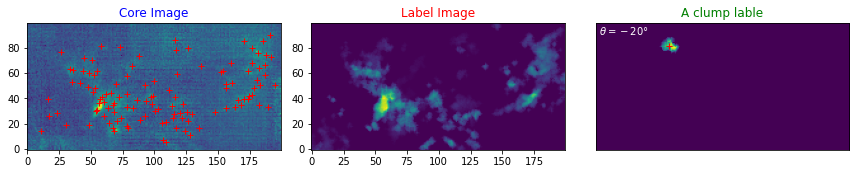

In [16]:
origin_data = real_data_M17_18

fig,(ax0,ax1,ax2)= plt.subplots(1,3, figsize=(12, 8))
for i in range(np.int(regions_data.max())):
    # Show the clumps which do not touch the edges.
    if clump_edge[i] == 0:
        center_x = clump_center[i][0]-1
        center_y = clump_center[i][1]-1
        ax0.plot(center_x,center_y,'r+')

#Obtain the region and angle of a clump. 
index = 50
clump_region_i_coords = np.where(regions_data == index+1)
clump_region_lable = np.zeros_like(origin_data)
clump_region_lable[clump_region_i_coords] = 1
ax2.text(2,origin_data.shape[1]-10,r'$\theta={}\degree$'.format(np.around(clump_angle[index],0)),color='white',fontsize=10 )
ax2.plot(clump_center[index][0]-1,clump_center[index][1]-1,'r+')

ax0.imshow(origin_data.sum(0))
ax1.imshow(regions_data.sum(0))
ax2.imshow(clump_region_lable.sum(0))
ax0.set_title('Core Image',fontsize=12,color='b')
ax1.set_title('Label Image',fontsize=12,color='r')
ax2.set_title('A clump lable',fontsize=12,color='g')
for ax in [ax0,ax1,ax2]:
    ax.invert_yaxis()
fig.tight_layout()
plt.xticks([]),plt.yticks([])
plt.show()

findfont: Font family ['Times New Roman'] not found. Falling back to DejaVu Sans.


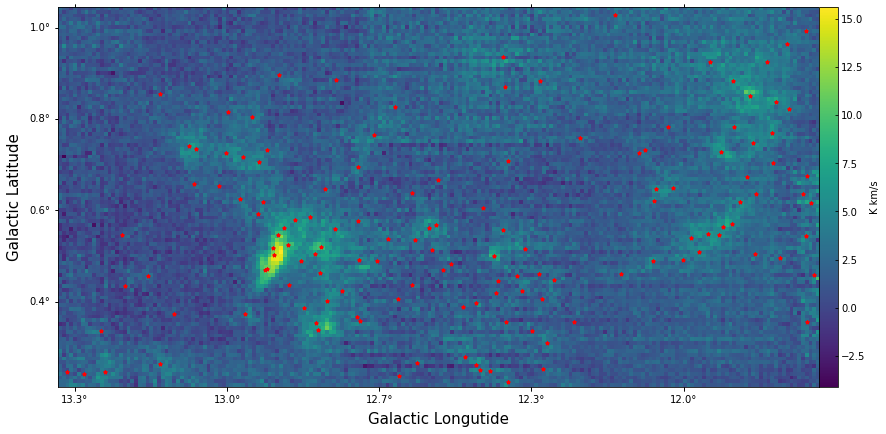

In [17]:
# path_M17_13 = '../Real_Data_Test/Real_Data/M17_1.fits'
path_M17_18 = '../Real_Data_Test/Real_Data/M17_C18O_Part.fits'

path = path_M17_18
pathe = path_M16
data_cube = fits.getdata(path)
data_header = fits.getheader(path)
wcs = WCS.WCS(data_header)

fig = plt.figure(figsize=(18,7))
ax = fig.add_subplot(111,projection=wcs.celestial)

plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'
plt.rcParams['xtick.color'] = 'red'
font2 = {'family' : 'Times New Roman',
'weight' : 'normal',
'size' : 15,
}
plt.xlabel("Galactic Longutide",font2)
plt.ylabel("Galactic Latitude",font2)


for i in range(len(clump_center)):
    center_x = clump_center[i][0]-1
    center_y = clump_center[i][1]-1
    ax.plot(center_x,center_y,'r*',markersize = 4) 

lon = ax.coords[0]
lat = ax.coords[1]
lon.set_major_formatter("d.d")
lat.set_major_formatter("d.d")
lon.set_ticks(spacing=20 * u.arcmin)

gci = plt.imshow(data_cube.sum(axis=0)*0.166)#,cmap='gray'
cbar = plt.colorbar(gci,pad=0)
cbar.set_label('K km/s')
# plt.xticks([]),plt.yticks([])
# plt.savefig('Example_0.pdf', format='pdf', dpi=1000)
plt.show()

# Note

1, See file **Examples_Simulation** for more usage details.

2, Module **Detect_Files** has been converted to **WCS** coordinate system. The position coordinates **start at 1**.
